<a href="https://colab.research.google.com/github/pravinkucha/Deep-Learning/blob/master/classification_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving data_breast_cancer.csv to data_breast_cancer (2).csv
User uploaded file "data_breast_cancer.csv" with length 125204 bytes


In [0]:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['data_breast_cancer.csv'].decode('utf-8')))
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


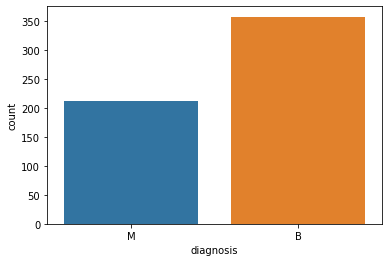

In [0]:
import seaborn as sns

ax = sns.countplot(data['diagnosis'],label='Count')

B,M = data['diagnosis'].value_counts()
print("Benign",B)
print("Malignanat",M)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
del data['Unnamed: 32']


In [0]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values
#encodeing categorical data
from sklearn.preprocessing import LabelEncoder
obj_label_encode = LabelEncoder()
y = obj_label_encode.fit_transform(y)
#spllit dataset into Training and testing
from sklearn.model_selection import train_test_split
X_train,X_testing,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# Feature scaling

from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X_train     = sc.fit_transform(X_train)
X_testing   = sc.fit_transform(X_testing)
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [0]:
X_testing

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [0]:
!pip install keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#Adding input with First hidden layer
clasifier = Sequential()
clasifier.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30))
#Adding the second hidden layer
clasifier.add(Dense(output_dim=16,init='uniform',activation='relu'))
#Adding the output layer
clasifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [0]:
clasifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [0]:
clasifier.fit(X_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
455/455 [==============================] - 0s 211us/step - loss: 0.6926 - accuracy: 0.7033
Epoch 2/150
455/455 [==============================] - 0s 19us/step - loss: 0.6910 - accuracy: 0.7538
Epoch 3/150
455/455 [==============================] - 0s 20us/step - loss: 0.6888 - accuracy: 0.7802
Epoch 4/150
455/455 [==============================] - 0s 18us/step - loss: 0.6856 - accuracy: 0.8440
Epoch 5/150
455/455 [==============================] - 0s 19us/step - loss: 0.6807 - accuracy: 0.8901
Epoch 6/150
455/455 [==============================] - 0s 24us/step - loss: 0.6734 - accuracy: 0.9121
Epoch 7/150
455/455 [==============================] - 0s 23us/step - loss: 0.6630 - accuracy: 0.9319
Epoch 8/150
455/455 [==============================] - 0s 26us/step - loss: 0.6489 - accuracy: 0.9363
Epoch 9/150
455/455 [==============================] - 0s 20us/step - loss: 0.6300 - accuracy: 0.9407
Epoch 10/150
455/455 [==============================] - 0s 20us/step - loss: 0.60

In [0]:
X_testing

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [0]:
#Predicting The test set result

y_pred = clasifier.predict(X_testing)
y_pred = (y_pred>0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  2],
       [ 3, 44]])

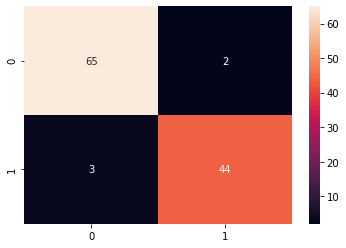

In [0]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')